In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [3]:
iris = datasets.load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
X = iris.data[:, [0,2]]
X # 2 dimensions of the original data
y = iris.target

Text(0.5, 1.0, 'raw data')

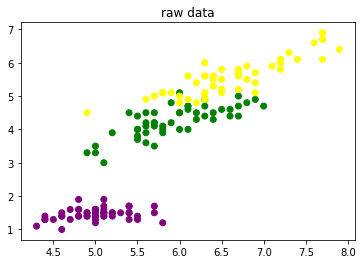

In [34]:
plt.scatter(X[:,0], X[:,1], color=np.select([y==0,y==1,y==2],['purple','green','yellow']))
plt.title('raw data')

In [38]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel = 'rbf', probability=True)
clf4 = VotingClassifier(estimators=[('dt', clf1), 
                                    ('knn', clf2), 
                                    ('svc', clf3)], 
                        voting='soft', 
                        weights=(2,1,2))

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=4,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best')),
         

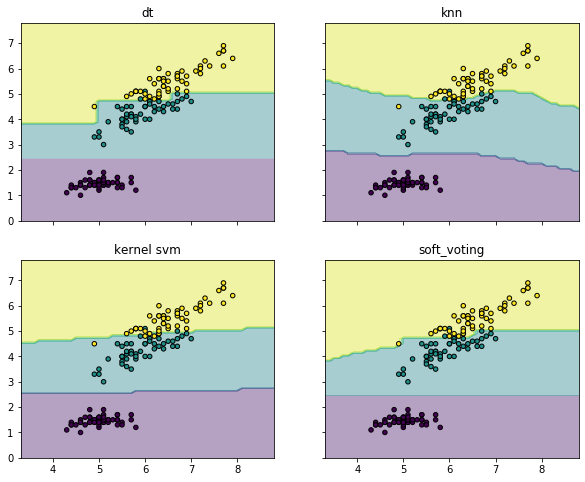

In [51]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
fx, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(10,8))
for idx, clf, tt in zip(itertools.product([0,1],[0,1]), [clf1, clf2, clf3, clf4], ['dt', 'knn', 'kernel svm', 'soft_voting']):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # about numpy.c_ and numpy.r_, check the link: https://blog.csdn.net/weixin_41797117/article/details/80048688
    z = z.reshape(xx.shape)
    # xx is a matrix contain all the xs, and yy is a matrix contrain all the ys. z is a matrix contrain all the value. contour figure is actually a 3-d figure.
    fig = axarr[idx[0], idx[1]]
    fig.contourf(xx, yy, z, alpha=0.4)
    fig.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    fig.set_title(tt)